In [144]:
import numpy as np
import io
import pandas as pd
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import PIL.ImageOps
import random
from wordcloud import ImageColorGenerator

from konlpy.tag import Kkma
from konlpy.tag import Hannanum
hannanum = Hannanum()
from konlpy.utils import pprint

In [145]:
print (plt.rcParams['font.family'] )
plt.rcParams["font.family"] = 'Hancom Gothic'

['Hancom Gothic']


In [146]:
import os
file_lst = os.listdir("C:/Users/gjkim/Desktop/테크노 매트릭스/text mining/연설문/")
file_lst[:len(file_lst)]

['김대중대통령취임사.txt',
 '김영삼대통령취임사.txt',
 '노무현대통령취임사.txt',
 '노태우대통령취임사.txt',
 '문재인대통령취임사.txt',
 '박근혜대통령취임사.txt',
 '박정희5대대통령취임사.txt',
 '윤보선대통령취임사.txt',
 '이명박대통령취임사.txt',
 '이승만대통령취임사_2개.txt',
 '전두환11대대통령취임사.txt',
 '최규하대통령취임사.txt']

In [147]:
doc_set = [[] for x in list(range(len(file_lst[:len(file_lst)])))]
for index in range(len(file_lst)):
    doc = open("C:/Users/gjkim/Desktop/테크노 매트릭스/text mining/연설문/" + file_lst[index],'r').read()
    doc_set[index] = doc.replace('\n',"")
doc_set

["존경하고 사랑하는 국민 여러분!오늘 저는 대한민국 제15대 대통령에 취임하게 되었습니다. 정부수립 50년만에 처음 이루어진 여야간 정권교체를 여러분과 함께 기뻐하면서, 온갖 시련과 장벽을 넘어 진정한 '국민의 정부'를 탄생시킨 국민 여러분께 찬양과 감사의 말씀을 드리는 바입니다.그리고 저의 취임을 축하하기 위해 이 자리에 함께 해주신 김영삼 전임 대통령, 폰 바이체커 독일 전 대통령, 코라손 아키노 필리핀 전 대통령, 후안 안토니오 사마란치 IOC위원장 등 내외 귀빈을 비롯한 참석자 여러분께도 깊이 감사드립니다.오늘 이 취임식의 역사적인 의미는 참으로 크다고 할 것입니다. 오늘은 이 땅에서 처음으로 민주적 정권교체가 실현되는 자랑스러운 날입니다. 또한 민주주의와 경제를 동시에 발전시키려는 정부가 마침내 탄생하는 역사적인 날이기도 합니다.이 정부는 국민의 힘에 의해 이루어진 참된 '국민의 정부' 입니다. 모든 영광과 축복을 국민 여러분께 드리면서, 제 몸과 마음을 다 바쳐 봉사할 것을 굳게 다짐하는 바입니다.친애하는 국민 여러분!우리는 3년 후면 새로운 세기를 맞게 됩니다. 21세기의 개막은 단순히 한 세기가 바뀌는 것만이 아니라, 새로운 혁명의 시작을 말합니다. 지구상에 인간이 탄생한 인간혁명으로부터 농업혁명, 도시혁명, 사상혁명, 산업혁명의 5대 혁명을 거쳐 인류는 이제 새로운 혁명의 시대로 들어서고 있는 것입니다.세계는 지금, 유형의 자원이 경제발전의 요소였던 산업사회로부터, 무형의 지식과 정보가 경제발전의 원동력이 되는 지식정보사회로 나아가고 있습니다.정보화 혁명은 세계를 하나의 지구촌으로 만들어, 국민경제시대로부터 세계경제시대로의 전환을 이끌고 있습니다. 정보화 시대는 누구나, 언제나, 어디서나, 손쉽고 값싸게 정보를 얻고 이용할 수 있는 시대를 말합니다. 이는 민주사회에서만 가능합니다.우리는 이와 같은 문명사적 대전환기를 맞아 새로운 도전에 전력을 다하여 능동적으로 대응해야 합니다. 그러나 불행하게도 이 중차대한 시기에 우리에게는 6.25이후 최대

In [148]:
import re
tokenizer = RegexpTokenizer(r'\w+')
texts = []
for i in doc_set:
    raw = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', ' ', i)
    raw = re.sub('읍니다$', '습니다$', raw)
    raw = re.sub('임니다$', '입니다$', raw)
    
    pos = hannanum.pos(raw)
    nouns = list()
    for keyword, type in pos:
        if type == 'N' or type == 'P' or type == 'M' :
            if len(keyword)>1:
                nouns.append(keyword)
                
    texts.append(nouns)

In [150]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = "다르 입니다 어느 참답 하여야겠읍니다 하겠읍니다 이야기 우리 이같은 가운데 가르 해야겠읍니다 관하 본인"
stop_words = stop_words.split(' ')

In [151]:
stop_words

['다르',
 '입니다',
 '어느',
 '참답',
 '하여야겠읍니다',
 '하겠읍니다',
 '이야기',
 '우리',
 '이같은',
 '가운데',
 '가르',
 '해야겠읍니다',
 '관하',
 '본인']

In [152]:
total = []

for i in range(len(texts)):
    result = []
    for w in texts[i]:
        if w not in stop_words:
            result.append(w)
    total.append(result)

In [153]:
total[2] = ['존경',
 '국민',
 '여러분',
 '오늘',
 '대한민국',
 '제16대',
 '대통령',
 '취임',
 '위하',
 '자리',
 '국민',
 '여러분',
 '위대한',
 '선택',
 '대한민국',
 '정부',
 '운영',
 '영광',
 '국민',
 '여러분',
 '뜨겁',
 '감사',
 '벅차',
 '소명',
 '국민',
 '여러분',
 '함께',
 '완수',
 '약속드',
 '아우르',
 '자리',
 '참석',
 '김대중',
 '대통령',
 '비롯',
 '대통령',
 '여러분',
 '고이즈미',
 '준이치로일본',
 '총리',
 '비롯',
 '세계',
 '각국',
 '경축',
 '사절',
 '내외',
 '귀빈',
 '여러분',
 '심심',
 '감사',
 '드리',
 '특별히',
 '자리',
 '빌리',
 '대구',
 '지하철',
 '참사',
 '희생자',
 '여러분',
 '명복',
 '유가족',
 '여러분',
 '위로',
 '드리',
 '다시',
 '이런',
 '불행',
 '되풀이',
 '재난관리체계',
 '전면',
 '점검',
 '획기적',
 '개선',
 '안전',
 '사회',
 '만들',
 '최선',
 '다하',
 '국민',
 '여러분',
 '역사',
 '도전',
 '극복',
 '연속',
 '열강',
 '놓이',
 '한반도',
 '숱하',
 '고난',
 '이기',
 '반만년동안',
 '민족',
 '자존',
 '독자적',
 '문화',
 '지키',
 '해방',
 '이후',
 '분단',
 '전쟁',
 '가난',
 '반세기만',
 '세계',
 '열두',
 '경제',
 '강국',
 '건설',
 '농경시대',
 '산업화',
 '거치',
 '지식정보화',
 '시대',
 '성공적',
 '진입',
 '그러나',
 '지금',
 '다시',
 '세계사적',
 '전환점',
 '직면',
 '도약',
 '후퇴',
 '평화',
 '긴장이냐',
 '갈림길',
 '세계',
 '안보',
 '상황',
 '불안',
 '이라크',
 '정세',
 '긴박',
 '특히',
 '북한',
 '문제',
 '둘러싸',
 '국제사회',
 '우려',
 '고조',
 '이럴수록',
 '평화',
 '지키',
 '더욱',
 '굳건히',
 '뿌리내리',
 '대외',
 '경제',
 '환경',
 '어렵',
 '선진국들',
 '끝없이',
 '새롭',
 '영역',
 '개척',
 '후발국',
 '무섭',
 '추격',
 '새롭',
 '성장',
 '동력',
 '발전',
 '전략',
 '요구',
 '사회',
 '내부',
 '국가',
 '명운',
 '결정짓',
 '문제들',
 '가로놓이',
 '과제',
 '국민',
 '여러분',
 '지혜',
 '결단',
 '기다리',
 '모든',
 '도전',
 '극복',
 '국민',
 '합치',
 '못하',
 '그러',
 '저력',
 '외환',
 '세계',
 '가장',
 '빨리',
 '지난해',
 '월드컵',
 '4강',
 '신화',
 '창조',
 '대통령',
 '선거',
 '모든',
 '과정',
 '통하',
 '참여',
 '민주주의',
 '피우',
 '존경',
 '국민',
 '여러분',
 '이제',
 '미래',
 '한반도',
 '갇히',
 '동북아',
 '시대',
 '근대',
 '이후',
 '세계',
 '변방',
 '머물',
 '동북아가',
 '이제',
 '세계',
 '경제',
 '새롭',
 '활력',
 '떠오르',
 '21세기',
 '동북아',
 '시대',
 '세계',
 '석학들',
 '예측',
 '착착',
 '현실',
 '나타나',
 '동북아',
 '경제규모',
 '세계',
 '5분',
 '일3국',
 '유럽연합',
 '인구',
 '한반',
 '동북아',
 '중심',
 '자리잡',
 '한반',
 '중국과일본',
 '대륙',
 '해양',
 '연결',
 '다리',
 '이런',
 '지정학적',
 '위치',
 '지난날',
 '고통',
 '그러나',
 '오늘날',
 '오히려',
 '기회',
 '21세기',
 '동북아',
 '시대',
 '중심적',
 '역할',
 '요구',
 '고급',
 '두뇌',
 '창의력',
 '세계일류',
 '정보화',
 '기반',
 '인천공항',
 '부산항',
 '광양항',
 '고속철',
 '하늘',
 '바다',
 '물류기반',
 '구비해',
 '동북아',
 '시대',
 '주도적',
 '기본적',
 '조건',
 '갖추',
 '한반',
 '동북아',
 '물류',
 '금융',
 '중심지',
 '거듭나',
 '동북',
 '시대',
 '경제',
 '출발',
 '동북아',
 '번영',
 '공동체',
 '이룩',
 '통하',
 '세계',
 '번영',
 '기이',
 '그리고',
 '언젠가',
 '평화',
 '공동체',
 '발전',
 '지금',
 '유럽연합',
 '평화',
 '공생',
 '질서',
 '동북아',
 '구축',
 '오래',
 '그렇',
 '동북아',
 '시대',
 '완성',
 '그러',
 '가깝',
 '혼신',
 '노력',
 '다하',
 '약속드',
 '국민',
 '여러분',
 '진정한',
 '동북아',
 '시대',
 '먼저',
 '한반도',
 '평화',
 '제도적',
 '정착',
 '한반도',
 '지구상',
 '마지막',
 '냉전지대',
 '20세기',
 '불행',
 '유산',
 '그러',
 '한반도',
 '세계',
 '향하',
 '평화',
 '발신',
 '평화지대',
 '바뀌',
 '유라시',
 '대륙',
 '태평양',
 '동북아',
 '평화로운',
 '관문',
 '새롭',
 '태어나',
 '부산',
 '파리행',
 '기차표',
 '평양',
 '신의주',
 '중국',
 '몽골',
 '러시아',
 '거치',
 '유럽',
 '한복판',
 '도착',
 '앞당기',
 '이제',
 '한반도',
 '평화',
 '증진',
 '위하',
 '노력',
 '기울이',
 '괄목',
 '남북한',
 '사이',
 '사람',
 '교류가일상적인일',
 '빈번',
 '하늘',
 '바다',
 '모두',
 '열리',
 '그러나',
 '정책',
 '추진',
 '과정',
 '더욱',
 '광범위',
 '국민적',
 '합의',
 '과제',
 '남기',
 '그동안',
 '성과',
 '계승',
 '발전',
 '정책',
 '추진방식',
 '개선',
 '한반',
 '평화증진',
 '공동번영',
 '목표',
 '평화번영정책',
 '몇가지',
 '원칙',
 '추진',
 '첫째',
 '모든',
 '현안',
 '대화',
 '통하',
 '둘째',
 '상호신뢰',
 '우선',
 '호혜주의',
 '실천',
 '셋째',
 '남북',
 '당사자',
 '원칙',
 '기초해',
 '원활한',
 '국제협력',
 '추구',
 '넷째',
 '대내외적',
 '투명성',
 '높이',
 '국민참여',
 '확대',
 '초당적',
 '협력',
 '국민',
 '함께하',
 '평화번영정책',
 '북한',
 '핵무기',
 '개발',
 '의혹',
 '한반도',
 '비롯',
 '동북아',
 '세계',
 '평화',
 '중대한',
 '위협',
 '북한',
 '개발',
 '용인',
 '북한',
 '개발',
 '계획',
 '포기',
 '북한',
 '개발',
 '계획',
 '포기',
 '국제사회',
 '북한',
 '원하',
 '제공',
 '북한',
 '핵무기',
 '보유',
 '체제안전',
 '경제지원',
 '약속',
 '선택',
 '아우르',
 '북한',
 '문제',
 '대화',
 '통하',
 '평화적',
 '해결',
 '거듭',
 '강조',
 '어떤',
 '형태',
 '군사적',
 '긴장',
 '고조',
 '북한',
 '문제',
 '대화',
 '통하',
 '해결',
 '미국',
 '일본',
 '공조',
 '강화',
 '중국',
 '러시아',
 '유럽연합',
 '긴밀',
 '협력',
 '올해',
 '한미동맹',
 '50주년',
 '한미동맹',
 '안전보장',
 '경제발전',
 '기이',
 '국민',
 '깊이',
 '감사',
 '한미동맹',
 '소중히',
 '발전',
 '호혜평등',
 '관계',
 '더욱',
 '성숙',
 '전통우방',
 '비롯',
 '다른',
 '국가들',
 '관계',
 '확대',
 '국민',
 '여러분',
 '동북아',
 '시대',
 '한반도',
 '평화',
 '정착',
 '사회',
 '건강',
 '미래지향적',
 '비전',
 '그러',
 '개혁',
 '통합',
 '위하',
 '지속적',
 '노력',
 '필요',
 '개혁',
 '성장',
 '동력',
 '통합',
 '도약',
 '디딤돌',
 '정부',
 '개혁',
 '통합',
 '바탕',
 '국민',
 '함께',
 '민주주의',
 '더불',
 '균형발전사회',
 '평화',
 '번영',
 '동북아시대',
 '이러하',
 '목표',
 '위하',
 '원칙',
 '신뢰',
 '공정',
 '투명',
 '대화',
 '타협',
 '분권',
 '자율',
 '정부',
 '국정운영',
 '좌표',
 '분야',
 '새롭',
 '성장',
 '동력',
 '창출',
 '외환위',
 '초래',
 '제반',
 '아직',
 '극복',
 '과제',
 '시장',
 '제도',
 '세계기준',
 '공정',
 '투명',
 '개혁',
 '기업하기',
 '나라',
 '만들',
 '정치',
 '바뀌',
 '진정',
 '국민',
 '주인',
 '정치',
 '구현',
 '당리당략',
 '국리민복',
 '우선',
 '정치풍토',
 '조성',
 '대결과',
 '아니',
 '대화',
 '타협',
 '문제',
 '정치문화',
 '자리잡',
 '야당',
 '대화',
 '타협',
 '과학기술',
 '부단히',
 '혁신',
 '제2',
 '과학기술',
 '입국',
 '이루',
 '지식정보화',
 '기반',
 '지속적',
 '확충',
 '신산업',
 '육성',
 '문화',
 '함양',
 '문화산업',
 '발전도',
 '적극',
 '지원',
 '이러하',
 '국가목표',
 '부응',
 '교육',
 '혁신',
 '아이들',
 '입시지옥',
 '저마다',
 '소질',
 '창의력',
 '마음껏',
 '발휘',
 '경제',
 '지속적',
 '성장',
 '위하',
 '사회',
 '건강',
 '위하',
 '부정부패',
 '없애',
 '위하',
 '구조적',
 '제도적',
 '대안',
 '모색',
 '특히',
 '사회지도층',
 '성찰',
 '요망',
 '중앙',
 '집권',
 '수도권',
 '집중',
 '국가',
 '미래',
 '위하',
 '이상',
 '방치',
 '지방분권',
 '국가균형발전',
 '미루',
 '과제',
 '중앙',
 '지방',
 '조화',
 '균형',
 '이루',
 '발전',
 '지방',
 '자신',
 '미래',
 '자율적',
 '설계',
 '중앙',
 '비상한',
 '결의',
 '추진',
 '국민통합',
 '시대',
 '가장',
 '중요',
 '숙제',
 '지역구도',
 '완화',
 '위하',
 '정부',
 '지역탕평',
 '인사',
 '포함',
 '가능한',
 '모든',
 '조치',
 '취하',
 '소득격차',
 '비롯',
 '계층간',
 '격차',
 '좁히',
 '위하',
 '교육과',
 '세제',
 '개선',
 '강구',
 '노사화합',
 '협력',
 '문화',
 '이루',
 '노사',
 '여러분',
 '함께',
 '최선',
 '다하',
 '노약자',
 '비롯',
 '소외',
 '사람들',
 '관심',
 '기울이',
 '따뜻한',
 '사회',
 '만들',
 '위하',
 '복지정책',
 '내실화',
 '모든',
 '종류',
 '불합리',
 '차별',
 '없애',
 '양성평등사회',
 '지향',
 '개방화',
 '시대',
 '농어업',
 '농어민',
 '위하',
 '대책',
 '강구',
 '고령사회',
 '도래',
 '대하',
 '준비',
 '소홀',
 '반칙',
 '특권',
 '용납',
 '시대',
 '이제',
 '끝나',
 '정의',
 '패배',
 '기회주의자',
 '득세',
 '굴절',
 '풍토',
 '청산',
 '원칙',
 '바로',
 '세우',
 '신뢰사회',
 '만들',
 '정정당당',
 '노력',
 '사람',
 '성공',
 '사회',
 '정직',
 '성실',
 '대다수',
 '국민',
 '보람',
 '느끼',
 '드리',
 '존경',
 '국민',
 '여러분',
 '오랜',
 '세월동안',
 '변방',
 '역사',
 '자신',
 '운명',
 '스스로',
 '결정',
 '못하',
 '의존',
 '역사',
 '강요',
 '그러나',
 '이제',
 '새롭',
 '전기',
 '21세기',
 '동북아',
 '시대',
 '중심국가',
 '웅비',
 '기회',
 '기회',
 '살리',
 '나가',
 '수많',
 '도전',
 '극복',
 '저력',
 '기회',
 '만들',
 '지혜',
 '그런',
 '지혜',
 '저력',
 '오늘',
 '닥치',
 '도전',
 '극복',
 '오늘',
 '선조들',
 '훗날',
 '후손들',
 '오늘',
 '자랑',
 '조상',
 '기억',
 '마음',
 '합치',
 '기적',
 '이루',
 '국민',
 '모두',
 '마음',
 '평화',
 '번영',
 '도약',
 '역사',
 '만들',
 '위대한',
 '도정',
 '모두',
 '동참',
 '항상',
 '국민',
 '여러분',
 '함께',
 '감사']

In [154]:
c = []

for item in total[3]:

    #문자열 치환
    item_mod = item.replace('시대’', "시대")

    # 새로운 리스트에 추가
    c.append(item_mod)

c

['친애',
 '6천',
 '국내외',
 '동포',
 '여러분',
 '헌정발전',
 '뒷받침',
 '윤보선',
 '최규하',
 '대통령',
 '평화적',
 '정부이양',
 '역사적',
 '선례',
 '세우',
 '전두환',
 '대통령',
 '그리고',
 '자리',
 '빛내',
 '세계',
 '각국',
 '경축사절',
 '내외',
 '귀빈',
 '여러분',
 '오늘',
 '새롭',
 '시대',
 '개막',
 '선언',
 '위하',
 '성스럽',
 '민의',
 '전당',
 '모이',
 '동아시아',
 '변력국가',
 '세계',
 '중심국가',
 '뛰어오르',
 '민족웅비',
 '희망찬',
 '시대',
 '열리',
 '나라',
 '민주정부',
 '세우',
 '40년',
 '새롭',
 '새롭',
 '시대',
 '요청',
 '역사',
 '조류',
 '제13대',
 '대통력',
 '취임',
 '아득',
 '옛날',
 '민족',
 '터전',
 '일구',
 '모든',
 '선조들',
 '깊이',
 '머리',
 '숙이',
 '먼저',
 '동안',
 '숱하',
 '외세',
 '침략',
 '시련',
 '이기',
 '문화부통',
 '창조',
 '민족',
 '자존',
 '면면히',
 '불굴',
 '자주독립정신',
 '가슴',
 '새기',
 '가까이',
 '마디마디',
 '고생',
 '흔적',
 '역력',
 '형제자매',
 '동포',
 '여러분',
 '새삼',
 '경의',
 '우리들',
 '가난',
 '전쟁',
 '시달리',
 '아무것',
 '맨손',
 '그러나',
 '잘살',
 '뜨겁',
 '가슴',
 '흘리',
 '일한',
 '우리들',
 '맨손',
 '세계',
 '높이',
 '신흥공업국가',
 '자르',
 '그리고',
 '이제',
 '평화적',
 '정부이양',
 '전통',
 '이룩한',
 '민주국가',
 '국민',
 '위대',
 '놀랍',
 '국민적',
 '저력',
 '20세기가',
 '선진국',
 '도약',
 '모두',
 '무한',
 '격려',
 '새롭',
 '민족사',
 '출발

In [155]:
d = []
for item in c:

    #문자열 치환
    item_mod = item.replace('시대’입니다', "시대")

    # 새로운 리스트에 추가
    d.append(item_mod)

d

['친애',
 '6천',
 '국내외',
 '동포',
 '여러분',
 '헌정발전',
 '뒷받침',
 '윤보선',
 '최규하',
 '대통령',
 '평화적',
 '정부이양',
 '역사적',
 '선례',
 '세우',
 '전두환',
 '대통령',
 '그리고',
 '자리',
 '빛내',
 '세계',
 '각국',
 '경축사절',
 '내외',
 '귀빈',
 '여러분',
 '오늘',
 '새롭',
 '시대',
 '개막',
 '선언',
 '위하',
 '성스럽',
 '민의',
 '전당',
 '모이',
 '동아시아',
 '변력국가',
 '세계',
 '중심국가',
 '뛰어오르',
 '민족웅비',
 '희망찬',
 '시대',
 '열리',
 '나라',
 '민주정부',
 '세우',
 '40년',
 '새롭',
 '새롭',
 '시대',
 '요청',
 '역사',
 '조류',
 '제13대',
 '대통력',
 '취임',
 '아득',
 '옛날',
 '민족',
 '터전',
 '일구',
 '모든',
 '선조들',
 '깊이',
 '머리',
 '숙이',
 '먼저',
 '동안',
 '숱하',
 '외세',
 '침략',
 '시련',
 '이기',
 '문화부통',
 '창조',
 '민족',
 '자존',
 '면면히',
 '불굴',
 '자주독립정신',
 '가슴',
 '새기',
 '가까이',
 '마디마디',
 '고생',
 '흔적',
 '역력',
 '형제자매',
 '동포',
 '여러분',
 '새삼',
 '경의',
 '우리들',
 '가난',
 '전쟁',
 '시달리',
 '아무것',
 '맨손',
 '그러나',
 '잘살',
 '뜨겁',
 '가슴',
 '흘리',
 '일한',
 '우리들',
 '맨손',
 '세계',
 '높이',
 '신흥공업국가',
 '자르',
 '그리고',
 '이제',
 '평화적',
 '정부이양',
 '전통',
 '이룩한',
 '민주국가',
 '국민',
 '위대',
 '놀랍',
 '국민적',
 '저력',
 '20세기가',
 '선진국',
 '도약',
 '모두',
 '무한',
 '격려',
 '새롭',
 '민족사',
 '출발

In [156]:
e = []
for item in d:

    #문자열 치환
    item_mod = item.replace('시대입니다', "시대")

    # 새로운 리스트에 추가
    e.append(item_mod)

e

['친애',
 '6천',
 '국내외',
 '동포',
 '여러분',
 '헌정발전',
 '뒷받침',
 '윤보선',
 '최규하',
 '대통령',
 '평화적',
 '정부이양',
 '역사적',
 '선례',
 '세우',
 '전두환',
 '대통령',
 '그리고',
 '자리',
 '빛내',
 '세계',
 '각국',
 '경축사절',
 '내외',
 '귀빈',
 '여러분',
 '오늘',
 '새롭',
 '시대',
 '개막',
 '선언',
 '위하',
 '성스럽',
 '민의',
 '전당',
 '모이',
 '동아시아',
 '변력국가',
 '세계',
 '중심국가',
 '뛰어오르',
 '민족웅비',
 '희망찬',
 '시대',
 '열리',
 '나라',
 '민주정부',
 '세우',
 '40년',
 '새롭',
 '새롭',
 '시대',
 '요청',
 '역사',
 '조류',
 '제13대',
 '대통력',
 '취임',
 '아득',
 '옛날',
 '민족',
 '터전',
 '일구',
 '모든',
 '선조들',
 '깊이',
 '머리',
 '숙이',
 '먼저',
 '동안',
 '숱하',
 '외세',
 '침략',
 '시련',
 '이기',
 '문화부통',
 '창조',
 '민족',
 '자존',
 '면면히',
 '불굴',
 '자주독립정신',
 '가슴',
 '새기',
 '가까이',
 '마디마디',
 '고생',
 '흔적',
 '역력',
 '형제자매',
 '동포',
 '여러분',
 '새삼',
 '경의',
 '우리들',
 '가난',
 '전쟁',
 '시달리',
 '아무것',
 '맨손',
 '그러나',
 '잘살',
 '뜨겁',
 '가슴',
 '흘리',
 '일한',
 '우리들',
 '맨손',
 '세계',
 '높이',
 '신흥공업국가',
 '자르',
 '그리고',
 '이제',
 '평화적',
 '정부이양',
 '전통',
 '이룩한',
 '민주국가',
 '국민',
 '위대',
 '놀랍',
 '국민적',
 '저력',
 '20세기가',
 '선진국',
 '도약',
 '모두',
 '무한',
 '격려',
 '새롭',
 '민족사',
 '출발

In [165]:
total[4]

['존경',
 '사랑',
 '국민',
 '여러분',
 '감사',
 '국민',
 '여러분',
 '위대한',
 '선택',
 '머리',
 '숙이',
 '깊이',
 '감사드리',
 '오늘',
 '대한민국',
 '19대',
 '대통령',
 '새롭',
 '대한민국',
 '향하',
 '첫걸음',
 '내딛',
 '지금',
 '어깨',
 '국민',
 '여러분',
 '막중',
 '소명감',
 '무겁',
 '지금',
 '가슴',
 '한번',
 '경험',
 '못하',
 '나라',
 '만들',
 '열정',
 '뜨겁',
 '그리고',
 '지금',
 '머리',
 '통합',
 '공존',
 '새롭',
 '세상',
 '청사진',
 '가득',
 '만들',
 '새롭',
 '대한민국',
 '숱하',
 '좌절',
 '패배',
 '불구',
 '선대들',
 '일관',
 '추구',
 '나라',
 '희생',
 '헌신',
 '감내',
 '젊은이들',
 '그토록',
 '이루',
 '나라',
 '그러',
 '대한민국',
 '만들',
 '위하',
 '역사',
 '국민',
 '두렵',
 '겸허한',
 '마음',
 '대한민국',
 '19대',
 '대통령',
 '소명',
 '다하',
 '천명',
 '함께',
 '선거',
 '치르',
 '후보들',
 '감사',
 '말씀',
 '함께',
 '심심',
 '위로',
 '전하',
 '이번',
 '선거',
 '승자',
 '패자',
 '새롭',
 '대한민국',
 '함께',
 '이끌',
 '동반자',
 '이제',
 '치열',
 '경쟁',
 '순간',
 '함께',
 '맞잡',
 '전진',
 '존경',
 '국민',
 '여러분',
 '지나',
 '유례없',
 '정치적',
 '격변기',
 '보내',
 '정치',
 '혼란',
 '국민',
 '위대',
 '현직',
 '대통령의',
 '탄핵',
 '구속',
 '국민들',
 '대한민국',
 '앞길',
 '국민들',
 '좌절',
 '오히려',
 '전화위복',
 '승화',
 '마침내',
 '오늘',
 '새롭',
 '세상',
 '대한민국',
 '위대함'

In [168]:
for i in range(12):
    for j in total[i]:
        if j == "경제부흥":
            print(i,j)

5 경제부흥
5 경제부흥
5 경제부흥
5 경제부흥


In [157]:
total[3] = e

In [158]:
dictionary = corpora.Dictionary(total)
dictionary

corpus = [dictionary.doc2bow(text) for text in total]
tfidf = models.TfidfModel(corpus)

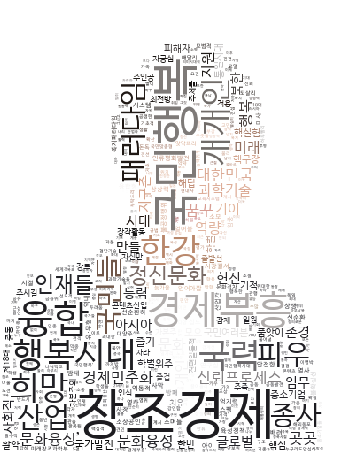

In [164]:
# corpus의 번호를 통해서 대통령 word_cloud 사진 추출

president_mask = np.array(Image.open("C:/Users/gjkim/Desktop/테크노 매트릭스/text mining/박근혜2.jpg"))
top_words = np.sort(np.array(tfidf[corpus[5]],dtype = [('word',int), ('score',float)]),order='score')[::-1]
wc = WordCloud(font_path='C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf',
               background_color="white",
               mask=president_mask,
               random_state=5,
               max_words=2000,
               width=2000,
               height=2000).fit_words(dict([(dictionary[word],score) for word,score in top_words]))

image_colors = ImageColorGenerator(president_mask)

plt.figure(num=None, figsize=(60, 60), dpi=10, facecolor='w', edgecolor='k')
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.show()

wc.to_file("박근혜_wordcloud.png")